In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 42.1 MB/s eta 0:00:00


In [4]:
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

In [5]:
from datasets import load_dataset, DatasetDict

# Load dataset
ds = load_dataset("Jiwonny29/darkmagician")

# Organize into a single DatasetDict
ds = DatasetDict({
    'train': ds['train'],
    'test': ds['test']
})

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [6]:
ds['train']

Dataset({
    features: ['image', 'id', 'name', 'type', 'desc', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 'image_url', 'image_path', 'simplified_type'],
    num_rows: 49
})

In [7]:
ds['test']

Dataset({
    features: ['image', 'id', 'name', 'type', 'desc', 'atk', 'def', 'level', 'race', 'attribute', 'archetype', 'image_url', 'image_path', 'simplified_type'],
    num_rows: 13
})

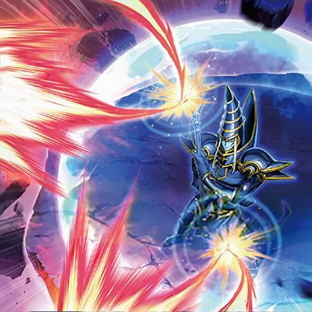

In [8]:
example = ds['train'][0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.5*width), int(0.5*height))))

In [9]:
example["desc"]

'When an opponent\'s monster declares an attack, or an opponent\'s monster effect is activated that would destroy a monster(s) on the field, and a monster that mentions "Shining Sarcophagus" is on the field: The first time each monster you control that mentions "Shining Sarcophagus" would be destroyed by battle or card effect for the rest of this turn after this card resolves, it is not destroyed, also destroy as many opponent\'s Attack Position monsters as possible, then, if you control "Dark Magician", inflict 500 damage to them for each monster destroyed.'

In [10]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        encoding = self.processor(images=item["image"], text=item["desc"], padding="max_length", return_tensors="pt")

        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}

        # Generate attention mask
        attention_mask = encoding["input_ids"].clone()
        attention_mask[attention_mask != self.processor.tokenizer.pad_token_id] = 1

        encoding["attention_mask"] = attention_mask

        return encoding

In [11]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/git-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [12]:
train_dataset = ImageCaptioningDataset(ds['train'], processor)

In [13]:
item = train_dataset[0]
for k,v in item.items():
  print(k,v.shape)

Unused or unrecognized kwargs: padding.


input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [15]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


input_ids torch.Size([2, 512])
attention_mask torch.Size([2, 512])
pixel_values torch.Size([2, 3, 224, 224])


In [16]:
processor.decode(batch["input_ids"][0])

"[CLS]'' the ultimate wizard in terms of attack and defense.'' [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [ ]:
import numpy as np
from PIL import Image

# Load an image. For example, specify the image file path in 'image_path'.
image = Image.open('/content/drive/MyDrive/15256925.jpg')

# Convert the image to a numpy array.
image_array = np.array(image)

# Calculate the mean and standard deviation for each channel of the image.
mean = np.mean(image_array, axis=(0, 1))
std = np.std(image_array, axis=(0, 1))

print("Mean:", mean)
print("Std:", std)

Mean: [ 86.6060466   49.90052546 113.32085953]
Std: [63.33559519 46.89733065 69.72090798]


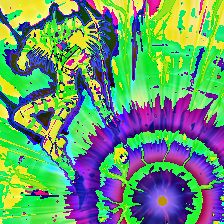

In [ ]:
from PIL import Image
import numpy as np

MEAN = np.array([86.6060466, 49.90052546, 113.32085953]) / 255
STD = np.array([63.33559519, 46.89733065, 69.72090798]) / 255

unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
Image.fromarray(unnormalized_image)

In [17]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [18]:
outputs = model(input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                pixel_values=batch["pixel_values"],
                labels=batch["input_ids"])
outputs.loss

tensor(11.7344, grad_fn=<NllLossBackward0>)

In [19]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch: 0
Loss: 11.492624282836914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 10.328191757202148


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.69870662689209


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.187755584716797


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 9.057151794433594


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.729816436767578


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.467804908752441


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.12508773803711


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 8.048762321472168


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.538956642150879


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.559406757354736


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.360818862915039


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 7.306528568267822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.775606155395508


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.812697410583496


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.318098545074463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.2619171142578125


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 6.388102054595947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.934323787689209


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.862277984619141


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.7967305183410645


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.427295684814453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 5.25663948059082


Unused or unrecognized kwargs: padding.


Loss: 5.031926155090332


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.793099403381348
Epoch: 1


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.562267780303955


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.530309677124023


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.374075889587402


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 4.013947486877441


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.951066017150879


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.8153090476989746


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.5088329315185547


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.356656074523926


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 3.080909490585327


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.90330171585083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.7476561069488525


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.868473768234253


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.4131312370300293


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.298663377761841


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 2.0393214225769043


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.7659509181976318


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.6392005681991577


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.8447564840316772


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.573835849761963


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.435738205909729


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.1382032632827759


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.0609785318374634


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 1.1707900762557983


Unused or unrecognized kwargs: padding.


Loss: 0.8420833349227905


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5748632550239563
Epoch: 2


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.6993679404258728


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.6215577721595764


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5980188250541687


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.7402034401893616


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.7054548263549805


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5675922632217407


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.692486584186554


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.37854087352752686


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.4413394331932068


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.32102885842323303


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.6521163582801819


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.33633437752723694


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5189168453216553


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.7282057404518127


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.23489618301391602


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5957995653152466


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3198854923248291


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.26925233006477356


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.5627272725105286


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08141133189201355


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.19990696012973785


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3462980389595032


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3151538372039795


Unused or unrecognized kwargs: padding.


Loss: 0.27630576491355896


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.6380718350410461
Epoch: 3


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3278387188911438


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3486095368862152


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.47486627101898193


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.42797642946243286


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07450887560844421


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.35340428352355957


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.30553194880485535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2304360717535019


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.22755318880081177


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2844565212726593


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.4169536828994751


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.215514674782753


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.44152161478996277


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20889730751514435


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.19540759921073914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0636637955904007


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.33930402994155884


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11120244860649109


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.389018714427948


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.44366970658302307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03611565753817558


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.25351813435554504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2546764314174652


Unused or unrecognized kwargs: padding.


Loss: 0.3496605157852173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2801915407180786
Epoch: 4


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1207728236913681


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3519155979156494


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.28457045555114746


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.16214461624622345


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.21462392807006836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17300936579704285


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11764600872993469


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2719031572341919


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3128528594970703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1711762696504593


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05426511913537979


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11516539007425308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3495289385318756


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.23281791806221008


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13248184323310852


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.23011191189289093


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.18956133723258972


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10547751188278198


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1784248650074005


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.29588204622268677


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15631912648677826


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17971378564834595


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.3852153420448303


Unused or unrecognized kwargs: padding.


Loss: 0.12949305772781372


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.4629298746585846
Epoch: 5


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10004264861345291


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.21710580587387085


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09885332733392715


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.18490058183670044


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15728120505809784


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2852899134159088


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13767848908901215


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11238934844732285


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.31189754605293274


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06816472858190536


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12677353620529175


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2710059881210327


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15681998431682587


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13196103274822235


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20217767357826233


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2885928750038147


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05610332638025284


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.24138836562633514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.23623362183570862


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08241891860961914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02092934586107731


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.16387076675891876


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17217932641506195


Unused or unrecognized kwargs: padding.


Loss: 0.15880516171455383


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12002051621675491
Epoch: 6


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05127745494246483


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1088879406452179


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0975443571805954


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17159712314605713


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15143921971321106


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1362658441066742


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.17164961993694305


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2051018476486206


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20553621649742126


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08635761588811874


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11743495613336563


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13971392810344696


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.2040630280971527


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12889498472213745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0944681167602539


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10587913542985916


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06377299875020981


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13642790913581848


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.20391303300857544


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11509992182254791


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09935682266950607


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12289784848690033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.12339404225349426


Unused or unrecognized kwargs: padding.


Loss: 0.03437943384051323


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01697653904557228
Epoch: 7


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06436297297477722


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10640815645456314


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10807877033948898


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11106990277767181


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1359066367149353


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09514077007770538


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.033080440014600754


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13653355836868286


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08963009715080261


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11348754167556763


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025819778442382812


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15484856069087982


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1081797257065773


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08660506457090378


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.18497240543365479


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09297790378332138


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.061806570738554


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09314224869012833


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11516162753105164


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09734997153282166


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0754297748208046


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08319169282913208


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02610614150762558


Unused or unrecognized kwargs: padding.


Loss: 0.20416340231895447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1530148833990097
Epoch: 8


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08065459877252579


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07628133147954941


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.14452461898326874


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02240888588130474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05773576349020004


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06638813763856888


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06620336323976517


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07479109615087509


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012990999966859818


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07409536093473434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1297837346792221


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07887716591358185


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05623447149991989


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.15808293223381042


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08245478570461273


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13474099338054657


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09017948061227798


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0781429260969162


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1197381466627121


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0609532855451107


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.13164745271205902


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.10725592076778412


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.139158234000206


Unused or unrecognized kwargs: padding.


Loss: 0.05376938357949257


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11566006392240524
Epoch: 9


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06010591983795166


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08808934688568115


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06982927024364471


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0395154133439064


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0932772159576416


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05122765153646469


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06198572367429733


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.055506303906440735


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07474137097597122


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.061374738812446594


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023470396175980568


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.085079625248909


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07084336876869202


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.08070329576730728


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.11280088871717453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06232696399092674


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06752143055200577


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09360241889953613


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06932016462087631


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05174028500914574


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06441870331764221


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.1461491733789444


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.036837317049503326


Unused or unrecognized kwargs: padding.


Loss: 0.033482518047094345


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07737201452255249
Epoch: 10


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03554995730519295


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.044203925877809525


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07205004245042801


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03878016024827957


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05221373960375786


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09221550077199936


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025770412757992744


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06119830533862114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.038189589977264404


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06971818953752518


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06528189033269882


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09725621342658997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05400827154517174


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06956052035093307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0497954785823822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.058741495013237


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03893645852804184


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09789367020130157


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01963934488594532


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04645819216966629


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02753470093011856


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.045887887477874756


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013853847980499268


Unused or unrecognized kwargs: padding.


Loss: 0.06765276938676834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07355298101902008
Epoch: 11


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.036218248307704926


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.055703017860651016


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.032710883766412735


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.036558154970407486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029495758935809135


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014942323789000511


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05078141391277313


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03896493837237358


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02257869951426983


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04478602483868599


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.09130094200372696


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07752625644207001


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04227375239133835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.039226073771715164


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04037395492196083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016448797658085823


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.07942675799131393


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.048159193247556686


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06947565823793411


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04473942145705223


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01793679967522621


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0884375348687172


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04463706538081169


Unused or unrecognized kwargs: padding.


Loss: 0.05351363494992256


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022646205499768257
Epoch: 12


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028897300362586975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04011530429124832


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05081299692392349


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04184016212821007


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03906024619936943


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.039763353765010834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.032767195254564285


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.048417914658784866


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0432874821126461


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.035497210919857025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04543176665902138


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028293641284108162


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02689296565949917


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.048077311366796494


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.036565493792295456


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.052713535726070404


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023209551349282265


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02781238593161106


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03460884466767311


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05934349074959755


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04824307933449745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.056768160313367844


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022812029346823692


Unused or unrecognized kwargs: padding.


Loss: 0.013729601167142391


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02793068438768387
Epoch: 13


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.030620655044913292


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03873297944664955


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.035135168582201004


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03116742894053459


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.045764289796352386


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.030898747965693474


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023593690246343613


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.06186559051275253


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03158849477767944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017259595915675163


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04173491522669792


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.034333474934101105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013364559970796108


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.05123013257980347


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.037440601736307144


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023533649742603302


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017938965931534767


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03828078880906105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02715860866010189


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03141458332538605


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.041615571826696396


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028195301070809364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04919649660587311


Unused or unrecognized kwargs: padding.


Loss: 0.034251317381858826


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03452828899025917
Epoch: 14


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04197174683213234


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03170204535126686


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012505300343036652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.046184659004211426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026349082589149475


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022656375542283058


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014962720684707165


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021234355866909027


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02744567021727562


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018260914832353592


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03483593463897705


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029062945395708084


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022991308942437172


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02752804569900036


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0262066088616848


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023379670456051826


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025603927671909332


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026213744655251503


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03749139979481697


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.041303060948848724


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03685428202152252


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.032816819846630096


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009391860105097294


Unused or unrecognized kwargs: padding.


Loss: 0.02668253891170025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022688094526529312
Epoch: 15


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025493938475847244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026192380115389824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029766876250505447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022209422662854195


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022806862369179726


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01905614510178566


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015316936187446117


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.031434111297130585


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022318709641695023


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019916512072086334


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028825953602790833


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026178481057286263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02818586677312851


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0271752942353487


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019485021010041237


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006007818039506674


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.030127784237265587


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022417191416025162


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01344203669577837


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011060439981520176


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029102975502610207


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02084898203611374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023574551567435265


Unused or unrecognized kwargs: padding.


Loss: 0.040042098611593246


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0312771312892437
Epoch: 16


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019180888310074806


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018719667568802834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012986800633370876


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02753840945661068


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011508774943649769


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03795245662331581


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029127467423677444


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021796975284814835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020998790860176086


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023268310353159904


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01433674804866314


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01989639177918434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013325484469532967


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024157296866178513


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012990139424800873


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007664128206670284


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0382467582821846


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01710502803325653


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020067857578396797


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005812144838273525


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01742810197174549


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0348617285490036


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03092258982360363


Unused or unrecognized kwargs: padding.


Loss: 0.02016533724963665


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.04114171862602234
Epoch: 17


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015245100483298302


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022334424778819084


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011609364300966263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0162635687738657


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026218993589282036


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03490979224443436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026447774842381477


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023116959258913994


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010241408832371235


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010890324600040913


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015881994739174843


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007806133013218641


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013662916608154774


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022169431671500206


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021521365270018578


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018343711271882057


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021734653040766716


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01982971280813217


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0193996150046587


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027332764118909836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0252162367105484


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02407953329384327


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018329767510294914


Unused or unrecognized kwargs: padding.


Loss: 0.022770587354898453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022827818989753723
Epoch: 18


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01052585244178772


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02410411275923252


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016299746930599213


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024572420865297318


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02362510934472084


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021990766748785973


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008791613392531872


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019671587273478508


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020558353513479233


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.030827442184090614


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011311773210763931


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017367960885167122


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02231624536216259


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016424227505922318


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018412528559565544


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010790144093334675


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018270352855324745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008879226632416248


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011742576956748962


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022247519344091415


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025431813672184944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03388237580657005


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021682733669877052


Unused or unrecognized kwargs: padding.


Loss: 0.025156760588288307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005557832308113575
Epoch: 19


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01785263419151306


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026338962838053703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012376240454614162


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009284203872084618


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017860891297459602


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009540720842778683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008398237638175488


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017372380942106247


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014925566501915455


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023910893127322197


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02546292170882225


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02233142964541912


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009873345494270325


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03010900691151619


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02395494282245636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012122775427997112


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02817072905600071


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003955613821744919


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027632225304841995


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021415097638964653


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021839873865246773


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017821507528424263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027187539264559746


Unused or unrecognized kwargs: padding.


Loss: 0.011366412974894047


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006445278413593769
Epoch: 20


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01927378587424755


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016977746039628983


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017488455399870872


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02080402337014675


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009459104388952255


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007319164462387562


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010127534158527851


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011338775046169758


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01849241927266121


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014190024696290493


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025253554806113243


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008000394329428673


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017312852665781975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02177269384264946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010295751504600048


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01641703024506569


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010440467856824398


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.027855170890688896


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012787742540240288


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016604537144303322


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010680115781724453


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022218331694602966


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014613905921578407


Unused or unrecognized kwargs: padding.


Loss: 0.018433446064591408


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0173343438655138
Epoch: 21


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009548486210405827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021632753312587738


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011165863834321499


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01051507517695427


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0102624436840415


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016127023845911026


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009309578686952591


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023523135110735893


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025152187794446945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008134277537465096


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012200702913105488


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018307838588953018


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00937329325824976


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01954951323568821


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017009448260068893


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00801966805011034


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01385042630136013


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019516577944159508


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007268579676747322


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023962754756212234


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011431491933763027


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014049663208425045


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019383879378437996


Unused or unrecognized kwargs: padding.


Loss: 0.016166793182492256


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025762833654880524
Epoch: 22


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005954952444881201


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006393463350832462


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013248579576611519


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013119281269609928


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005311083979904652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011385766789317131


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012938341125845909


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013062136247754097


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018572472035884857


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01306331530213356


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01909678615629673


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018097933381795883


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016930684447288513


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01951737143099308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01299536507576704


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0168460663408041


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02247067540884018


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017204128205776215


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01478059496730566


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01358745712786913


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010574993677437305


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01836443692445755


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020285680890083313


Unused or unrecognized kwargs: padding.


Loss: 0.02176671102643013


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02050936408340931
Epoch: 23


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015818115323781967


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01807273179292679


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012983967550098896


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012970292940735817


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01538772601634264


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009691782295703888


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007087946403771639


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005795174278318882


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008953910320997238


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010825750418007374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021819381043314934


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012254370376467705


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012470842339098454


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02171967178583145


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019215235486626625


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021204818040132523


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02153077907860279


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016520943492650986


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01384822465479374


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013736301101744175


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009061547927558422


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014440661296248436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019711900502443314


Unused or unrecognized kwargs: padding.


Loss: 0.013334717601537704


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020271167159080505
Epoch: 24


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021249080076813698


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007238295860588551


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009495345875620842


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01066361740231514


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011409402824938297


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011781292967498302


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011330542154610157


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009107920341193676


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02006622403860092


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0066862222738564014


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.028358094394207


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011543198488652706


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014514865353703499


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017979776486754417


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014644533395767212


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013702547177672386


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01868087612092495


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013116070069372654


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004680744372308254


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012437209486961365


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0062350560910999775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019590742886066437


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019714266061782837


Unused or unrecognized kwargs: padding.


Loss: 0.014687899500131607


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014297280460596085
Epoch: 25


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011744827032089233


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014693954028189182


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00931454822421074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0037172106094658375


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009273876436054707


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004936859477311373


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020917220041155815


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011007375083863735


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011501699686050415


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012474063783884048


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01156653929501772


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010721337981522083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011785700917243958


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016982221975922585


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009049132466316223


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0181577205657959


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015123775228857994


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014042755588889122


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00681271543726325


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012414076365530491


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011985613964498043


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009697570465505123


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02266456000506878


Unused or unrecognized kwargs: padding.


Loss: 0.01474121306091547


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0028296413365751505
Epoch: 26


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00907550472766161


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006142412777990103


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0033481863792985678


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010059572756290436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013985044322907925


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013449842110276222


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015346321277320385


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011364986188709736


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007643064018338919


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006218342576175928


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011271187104284763


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01068868301808834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006287751253694296


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014816469512879848


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01192199345678091


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009242940694093704


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01698623038828373


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013743235729634762


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017207354307174683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013841582462191582


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012525447644293308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01702667959034443


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009092429652810097


Unused or unrecognized kwargs: padding.


Loss: 0.013493893668055534


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012808489613234997
Epoch: 27


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009974676184356213


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010251130908727646


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006510068662464619


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009206239134073257


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009229380637407303


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007131967693567276


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008436492644250393


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014723272062838078


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010641627945005894


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01717190258204937


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008112025447189808


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01030730176717043


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014673473313450813


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027866922318935394


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01273488998413086


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008787928149104118


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01056285947561264


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010493773967027664


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01387976948171854


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009535029530525208


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006176698487251997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006970822811126709


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008991946466267109


Unused or unrecognized kwargs: padding.


Loss: 0.01165270060300827


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014825399965047836
Epoch: 28


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00566940987482667


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015096351504325867


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008344964124262333


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00906284712255001


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007301792502403259


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007544251158833504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00893351249396801


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003458811901509762


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008356352336704731


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007445643190294504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010333837941288948


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008212227374315262


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011067031882703304


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008447586558759212


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010877071879804134


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010222316719591618


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011039340868592262


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009881159290671349


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012082715518772602


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013414732180535793


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004438529256731272


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009918048046529293


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00998181477189064


Unused or unrecognized kwargs: padding.


Loss: 0.00484349112957716


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012808331288397312
Epoch: 29


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012065604329109192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007879954762756824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006511082872748375


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010404174216091633


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009614378213882446


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010039730928838253


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0095119783654809


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007519509643316269


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009251638315618038


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01419608760625124


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013310055248439312


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006884765345603228


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007121897768229246


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005429338663816452


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006167178507894278


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005127737298607826


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01192520558834076


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005159937776625156


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007713614497333765


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014952321536839008


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0077242180705070496


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007804340682923794


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012304422445595264


Unused or unrecognized kwargs: padding.


Loss: 0.014966443181037903


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01239580474793911
Epoch: 30


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008969360031187534


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008664838038384914


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003196971956640482


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010149254463613033


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010010055266320705


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01394718512892723


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01755538210272789


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008582442067563534


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006788268685340881


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007186050992459059


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0087729562073946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0061556072905659676


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013281896710395813


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034611341543495655


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013899581506848335


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013640918768942356


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011536732316017151


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009482341818511486


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01835780404508114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00497240386903286


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007876933552324772


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010195714421570301


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006900491658598185


Unused or unrecognized kwargs: padding.


Loss: 0.01608925312757492


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01535296905785799
Epoch: 31


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007083169650286436


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006704139057546854


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0076020886190235615


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007543721701949835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010821741074323654


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0029405024833977222


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014495044946670532


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011582090519368649


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019117025658488274


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006811266299337149


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004986019339412451


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004880359396338463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006215040571987629


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009764974005520344


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00953484047204256


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014890062622725964


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011984704993665218


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009973200038075447


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008748074993491173


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004404373932629824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00801012571901083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0045939041301608086


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023359017446637154


Unused or unrecognized kwargs: padding.


Loss: 0.005138126201927662


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009824911132454872
Epoch: 32


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008211106061935425


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005075530614703894


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009080691263079643


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009728576987981796


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010365915484726429


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009443487972021103


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009650319814682007


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0055215307511389256


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012375238351523876


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008136214688420296


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010114953853189945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0134955532848835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007381904404610395


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008240926079452038


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010756407864391804


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015057045966386795


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004760764539241791


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006119654513895512


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010519963689148426


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007353141903877258


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007465435191988945


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005935448221862316


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005614477675408125


Unused or unrecognized kwargs: padding.


Loss: 0.011496121995151043


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009812401607632637
Epoch: 33


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009422735311090946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009809781797230244


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009193017147481441


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009969663806259632


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007514947094023228


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015689093619585037


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012673758901655674


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003568243468180299


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0099263284355402


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0064683156087994576


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016591796651482582


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007995855063199997


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004050614312291145


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008758757263422012


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022882554680109024


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010643541812896729


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050271498039364815


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008913551457226276


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009267494082450867


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009181113913655281


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013414336368441582


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0026520288083702326


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007718183565884829


Unused or unrecognized kwargs: padding.


Loss: 0.010033548809587955


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03448675945401192
Epoch: 34


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00168682262301445


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015232911333441734


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011366228573024273


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008517533540725708


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013154658488929272


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006769648287445307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009802387095987797


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0016606398858129978


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008458968251943588


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004994898568838835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011175388470292091


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006558482069522142


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007738892454653978


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029009977355599403


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013038252480328083


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013840984553098679


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008125734515488148


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007980636321008205


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019831493496894836


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021113848313689232


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007532039657235146


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009761175140738487


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01069219782948494


Unused or unrecognized kwargs: padding.


Loss: 0.0016223479760810733


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01240337360650301
Epoch: 35


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008668473921716213


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011505133472383022


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006780670955777168


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011430037207901478


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011416894383728504


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01080936286598444


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008814678527414799


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0056557608768343925


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013757731765508652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008104912005364895


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011858487501740456


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008696374483406544


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011349267326295376


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012163335457444191


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008600450120866299


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006078529637306929


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011822426691651344


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010473167523741722


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009679727256298065


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009044934995472431


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004952050279825926


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005894852336496115


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016907241195440292


Unused or unrecognized kwargs: padding.


Loss: 0.005653484258800745


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016841063275933266
Epoch: 36


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007077998016029596


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009711677208542824


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005980548448860645


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009172200225293636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01134804729372263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006801335606724024


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01507542934268713


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004858893342316151


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009166247211396694


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02083211950957775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011128589510917664


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012663946487009525


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015900254249572754


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008342822082340717


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0095681706443429


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011402084492146969


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012003066018223763


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01088067889213562


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005164509639143944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011419367976486683


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013444856740534306


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009966195560991764


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019145937636494637


Unused or unrecognized kwargs: padding.


Loss: 0.04310021176934242


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.020986976101994514
Epoch: 37


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005555811803787947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013588618487119675


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00924163218587637


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006957131437957287


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03861255571246147


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018605569377541542


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006823956035077572


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026972142979502678


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02349068410694599


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006122291553765535


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01320064626634121


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016738323494791985


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006767181679606438


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013093453831970692


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012747291475534439


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01787625066936016


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014493339695036411


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0122744832187891


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008970088325440884


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007524456828832626


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010147779248654842


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01151821669191122


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026417287066578865


Unused or unrecognized kwargs: padding.


Loss: 0.01017087884247303


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002607456175610423
Epoch: 38


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010292685590684414


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005330511834472418


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01291770301759243


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0017264632042497396


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009082581847906113


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006575928069651127


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005608269479125738


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01797940954566002


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011757807806134224


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016975942999124527


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009958279319107533


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009715627878904343


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008711740374565125


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0034868945367634296


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014416859485208988


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010571779683232307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005743043962866068


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015067699365317822


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010744526982307434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01752532832324505


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015656599774956703


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010556921362876892


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018688451498746872


Unused or unrecognized kwargs: padding.


Loss: 0.009635906666517258


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01759759709239006
Epoch: 39


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0073211053386330605


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003574833506718278


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0050648231990635395


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005217942409217358


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006928143557161093


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007497262675315142


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008090846240520477


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011989397928118706


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005238579586148262


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007636151276528835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016307160258293152


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011679255403578281


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010504556819796562


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010803182609379292


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.025333121418952942


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01271493174135685


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010874117724597454


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014437488280236721


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01250763051211834


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013965928927063942


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01637430675327778


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019611595198512077


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02548273093998432


Unused or unrecognized kwargs: padding.


Loss: 0.015396020375192165


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0023767270613461733
Epoch: 40


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013623088598251343


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015240538865327835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012247107923030853


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006415335461497307


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014433273114264011


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.029711855575442314


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01611095666885376


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01969802938401699


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005322314333170652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014837302267551422


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010483389720320702


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014433820731937885


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01197727955877781


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010453891940414906


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013847324065864086


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015175620093941689


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019126029685139656


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014671162702143192


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011909641325473785


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007829873822629452


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008211283944547176


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016013354063034058


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.02624046802520752


Unused or unrecognized kwargs: padding.


Loss: 0.01765097863972187


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003544001840054989
Epoch: 41


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01304434984922409


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007860006764531136


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00905240885913372


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013300537131726742


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013038258999586105


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.026964064687490463


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03667500242590904


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007090122904628515


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016887787729501724


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004253472201526165


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014210916124284267


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007156745530664921


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009206945076584816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023380940780043602


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009302014485001564


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007985888049006462


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019805943593382835


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011091595515608788


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002802098635584116


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009009492583572865


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011115036904811859


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01521279290318489


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015931325033307076


Unused or unrecognized kwargs: padding.


Loss: 0.012241900898516178


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.042271845042705536
Epoch: 42


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009260724298655987


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010583892464637756


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010099349543452263


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021142208948731422


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01091177947819233


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0026926775462925434


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01121775433421135


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01606910675764084


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017568286508321762


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00837007723748684


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01622658409178257


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024528412148356438


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01494591310620308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011584439314901829


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01294587180018425


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.022085152566432953


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006068638525903225


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012163526378571987


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015112534165382385


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010769674554467201


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002999109448865056


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01554925087839365


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005602676421403885


Unused or unrecognized kwargs: padding.


Loss: 0.009106847457587719


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0030330021400004625
Epoch: 43


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018581097945570946


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011571982875466347


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006594620179384947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003984362818300724


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008152271620929241


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013518208637833595


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0064916182309389114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011262934654951096


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009390785358846188


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004199791233986616


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006367343943566084


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004988771863281727


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00944251473993063


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01068531908094883


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006962168496102095


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015851888805627823


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013122676871716976


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010969833470880985


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012453732080757618


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038631788920611143


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01107948087155819


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015298198908567429


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008722021244466305


Unused or unrecognized kwargs: padding.


Loss: 0.003998137544840574


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011509466916322708
Epoch: 44


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009640824981033802


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012325230985879898


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009956625290215015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00525835482403636


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0038241941947489977


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01694415509700775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01032696757465601


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019607173278927803


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009920245967805386


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00812945794314146


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008616387844085693


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006919889245182276


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0067843059077858925


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010195715352892876


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006535138003528118


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010249546729028225


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006046234630048275


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007799871731549501


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00899396650493145


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012335769832134247


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005786657799035311


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007023822981864214


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003384178737178445


Unused or unrecognized kwargs: padding.


Loss: 0.017120424658060074


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.021218648180365562
Epoch: 45


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005275942850857973


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011116141453385353


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006710664834827185


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009058675728738308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009543797932565212


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009656975045800209


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009702970273792744


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.015622016042470932


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009343464858829975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006148060318082571


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008302784524857998


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010484309867024422


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.03167629614472389


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0098509406670928


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010391178540885448


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009596220217645168


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005763482302427292


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00740248616784811


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007778655271977186


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014499237760901451


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008123508654534817


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010018687695264816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005359159782528877


Unused or unrecognized kwargs: padding.


Loss: 0.01060267724096775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004884402267634869
Epoch: 46


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008167106658220291


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016068467870354652


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0049300058744847775


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007834341377019882


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012472489848732948


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006319819018244743


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.024842994287610054


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010329351760447025


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017382174730300903


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0032049331348389387


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.013549767434597015


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014063543640077114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007840386591851711


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010913732461631298


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0138086574152112


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008932861499488354


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01913859136402607


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011473622173070908


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004927053116261959


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01901751570403576


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00701000913977623


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01197037659585476


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008756856434047222


Unused or unrecognized kwargs: padding.


Loss: 0.005796968471258879


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009557688608765602
Epoch: 47


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016307400539517403


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012010186910629272


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00869318749755621


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0025526408571749926


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010361729189753532


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010096822865307331


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008137382566928864


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011092088185250759


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010774272494018078


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012639263644814491


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.018365131691098213


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035172521602362394


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004286515526473522


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003908264450728893


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007240660022944212


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006910732947289944


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007428192533552647


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012655052356421947


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014063730835914612


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011510591022670269


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010037966072559357


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017533790320158005


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010972191579639912


Unused or unrecognized kwargs: padding.


Loss: 0.005641635973006487


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007842427119612694
Epoch: 48


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007775724865496159


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009083258919417858


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.023696374148130417


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00827046949416399


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00916806235909462


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011911445297300816


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00843057781457901


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00866291020065546


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010744767263531685


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008305772207677364


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006696136202663183


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007324019446969032


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.00897313840687275


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010719913989305496


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011920713819563389


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01214972697198391


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006602536886930466


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011828831396996975


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.014504247345030308


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006527855060994625


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.002346823923289776


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.011938628740608692


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.008070369251072407


Unused or unrecognized kwargs: padding.


Loss: 0.009610157459974289


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007306257728487253
Epoch: 49


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009441394358873367


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005043247248977423


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004790708422660828


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0035491499584168196


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01315541472285986


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0027546295896172523


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006824742071330547


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.005249571055173874


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.003687567077577114


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.006080215331166983


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007824750617146492


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.007898462004959583


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004425964783877134


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.012231951579451561


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.010631845332682133


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.017983291298151016


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.01226926501840353


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.0048814937472343445


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004714914131909609


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.009835583157837391


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.004185344558209181


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.016008500009775162


Unused or unrecognized kwargs: padding.
Unused or unrecognized kwargs: padding.


Loss: 0.019450848922133446


Unused or unrecognized kwargs: padding.


Loss: 0.019426872953772545
Loss: 0.013695175759494305


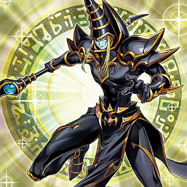

In [ ]:
# load image
example = ds['test'][0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

''the ultimate wizard in terms of attack and defense.''


### Ground Truth Text
86509711.jpg

Once per turn, when a card or effect is activated (except during the Damage Step): You can Tribute 1 "Dark Magician" or 1 "Dark Magician Girl"; Special Summon 1 "Dark Magician" or 1 "Dark Magician Girl" from your hand or GY, with a different name from the Tributed monster, and if you do, negate that activated effect. If this face-up card is sent from the Spell & Trap Zone to the GY: You can destroy 1 card on the field.

In [20]:
from nltk.translate.bleu_score import corpus_bleu
import nltk
nltk.download('punkt')

# Prepare test data
test_dataset = ImageCaptioningDataset(ds['test'], processor)

# DataLoader for test data
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=1)

# Generate captions for test data
generated_captions = []
ground_truth_captions = []

model.eval()
with torch.no_grad():
    for example in ds['test']:
        image = example["image"]
        inputs = processor(images=image, return_tensors="pt").to(device)
        pixel_values = inputs.pixel_values

        generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
        generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        generated_captions.append(generated_caption)
        ground_truth_captions.append(example["desc"])

# Calculate BLEU score
bleu_score = corpus_bleu([[caption] for caption in ground_truth_captions], generated_captions)

print("BLEU Score:", bleu_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


BLEU Score: 0.19271873476275952


In [21]:
model.save_pretrained("/content/drive/MyDrive")